# Symptom Analyzer: Disease Prediction
A compact ML-based system for predicting diseases from symptoms.

This notebook demonstrates:
1. Creating a dataset of symptoms and diseases
2. Training ML models (Naive Bayes, Random Forest)
3. Analyzing symptoms with an interactive interface

In [14]:
# Setup
import pandas as pd, numpy as np, os, re, warnings, joblib
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

warnings.filterwarnings('ignore')
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)
plt.style.use('ggplot')

# Text preprocessing
STOPWORDS = {'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
             'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through',
             'during', 'before', 'after', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off'}

def preprocess_text(text):
    '''Clean text by removing stopwords and punctuation'''
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    return ' '.join(token for token in text.split() if token not in STOPWORDS)

Loading data from data/default_symptom_disease.csv
Preprocessing symptoms...
Dataset Statistics:
Total samples: 45
Number of diseases: 9
Disease distribution:
Common Cold        5
Meningitis         5
Heart Attack       5
Tuberculosis       5
Gastroenteritis    5
Mononucleosis      5
Dengue             5
Diabetes           5
Asthma             5
Name: Disease, dtype: int64


,Symptoms,Disease,Processed_Symptoms
0,fever headache cough,Common Cold,fever headache cough
1,mild fever runny nose sore throat,Common Cold,mild fever runny nose sore throat
2,cough congestion sneezing,Common Cold,cough congestion sneezing


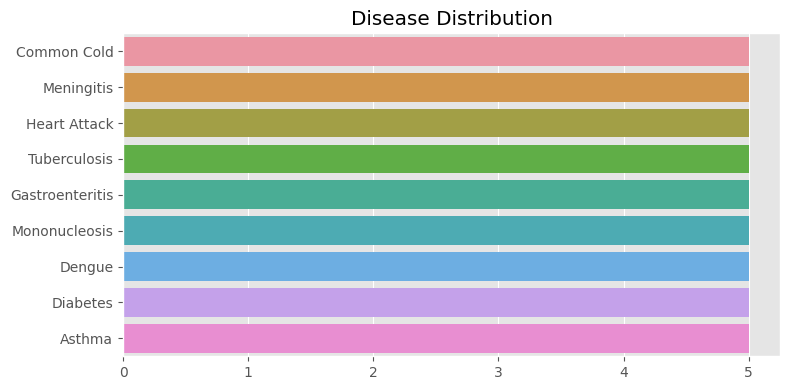

Extracting features using TF-IDF...
Feature dimension: 80
Splitting data into training and test sets...
Training samples: 31
Test samples: 14
Training Naive Bayes model...
Naive Bayes accuracy: 85.71%
Training Random Forest model...
Training Random Forest with 50 trees...
Training tree 1/5000
Training tree 11/5000
Training tree 21/5000
Training tree 31/5000
Training tree 41/5000
Training tree 51/5000
Training tree 61/5000
Training tree 71/5000
Training tree 81/5000
Training tree 91/5000
Training tree 101/5000
Training tree 111/5000
Training tree 121/5000
Training tree 131/5000
Training tree 141/5000
Training tree 151/5000
Training tree 161/5000
Training tree 171/5000
Training tree 181/5000
Training tree 191/5000
Training tree 201/5000
Training tree 211/5000
Training tree 221/5000
Training tree 231/5000
Training tree 241/5000
Training tree 251/5000
Training tree 261/5000
Training tree 271/5000
Training tree 281/5000
Training tree 291/5000
Training tree 301/5000
Training tree 311/5000
Tr

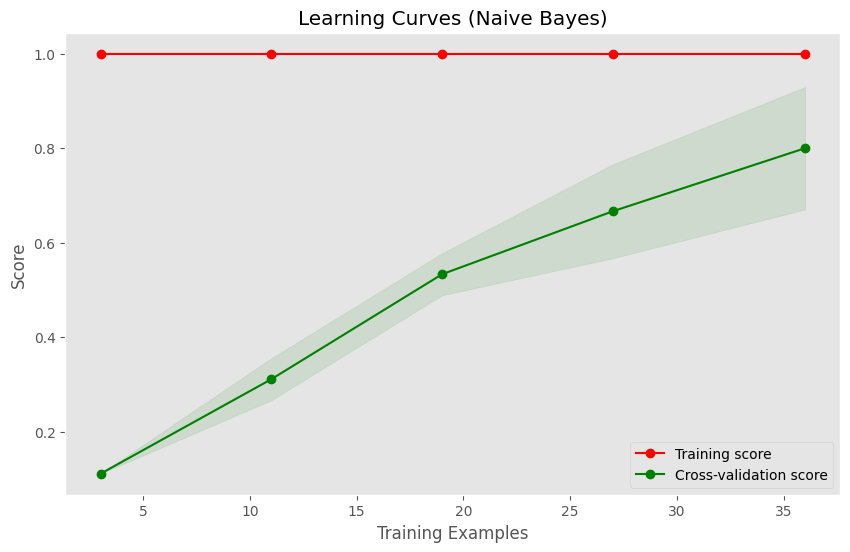

Training Random Forest with 50 trees...
Training tree 1/5000
Training tree 11/5000
Training tree 21/5000
Training tree 31/5000
Training tree 41/5000
Training tree 51/5000
Training tree 61/5000
Training tree 71/5000
Training tree 81/5000
Training tree 91/5000
Training tree 101/5000
Training tree 111/5000
Training tree 121/5000
Training tree 131/5000
Training tree 141/5000
Training tree 151/5000
Training tree 161/5000
Training tree 171/5000
Training tree 181/5000
Training tree 191/5000
Training tree 201/5000
Training tree 211/5000
Training tree 221/5000
Training tree 231/5000
Training tree 241/5000
Training tree 251/5000
Training tree 261/5000
Training tree 271/5000
Training tree 281/5000
Training tree 291/5000
Training tree 301/5000
Training tree 311/5000
Training tree 321/5000
Training tree 331/5000
Training tree 341/5000
Training tree 351/5000
Training tree 361/5000
Training tree 371/5000
Training tree 381/5000
Training tree 391/5000
Training tree 401/5000
Training tree 411/5000
Train

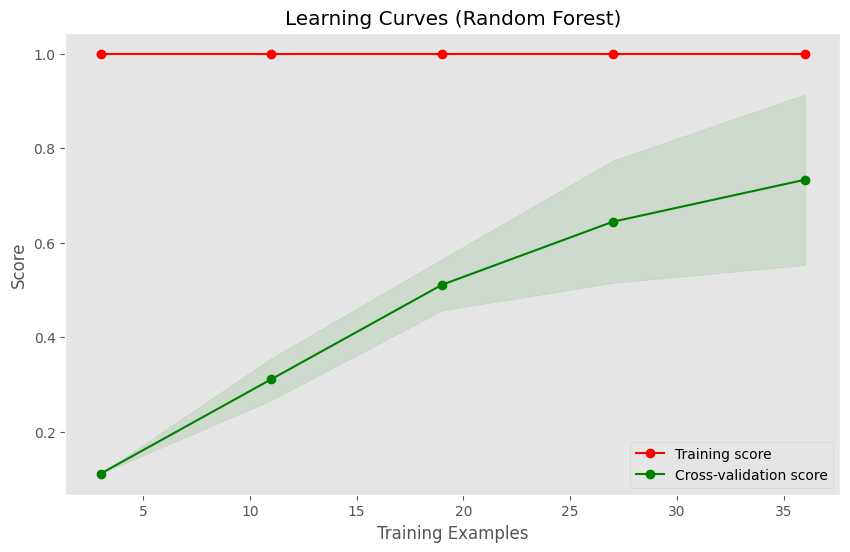

Detailed Classification Report:
                 precision    recall  f1-score   support

         Asthma       0.00      0.00      0.00         2
    Common Cold       1.00      0.50      0.67         2
         Dengue       0.00      0.00      0.00         1
       Diabetes       1.00      1.00      1.00         2
Gastroenteritis       0.50      1.00      0.67         1
   Heart Attack       0.33      1.00      0.50         1
     Meningitis       1.00      1.00      1.00         2
  Mononucleosis       0.50      0.50      0.50         2
   Tuberculosis       1.00      1.00      1.00         1

       accuracy                           0.64        14
      macro avg       0.59      0.67      0.59        14
   weighted avg       0.63      0.64      0.61        14

Analyzing feature importance...


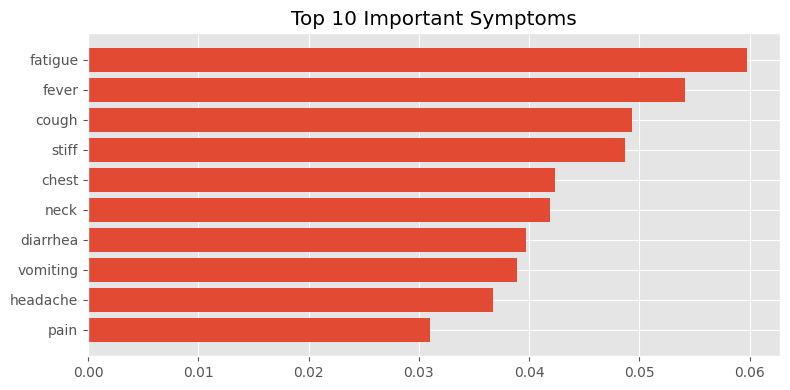

Top 5 most important symptoms:
  - chest: 0.0423
  - stiff: 0.0487
  - cough: 0.0493
  - fever: 0.0542
  - fatigue: 0.0598


In [21]:
# Load dataset and train models
# Check if dataset exists, otherwise download or create a sample
dataset_path = 'data/default_symptom_disease.csv'

if not os.path.exists(dataset_path):
    print(f"Dataset not found at {dataset_path}")
    
    # Search for any symptom CSV files in the data directory
    data_files = [f for f in os.listdir('data') if f.endswith('.csv')]
    
    if data_files:
        # Use the first available CSV file
        dataset_path = os.path.join('data', data_files[0])
        print(f"Using alternative dataset: {dataset_path}")
    else:
        # Create a basic sample dataset as fallback
        print("Creating sample dataset...")
        sample_data = '''Symptoms,Disease
fever headache cough,Common Cold
chest pain shortness of breath,Heart Attack
abdominal pain diarrhea nausea,Gastroenteritis
high fever headache stiff neck,Meningitis
wheezing shortness of breath,Asthma'''
        
        fallback_path = 'data/sample_symptom_disease.csv'
        with open(fallback_path, 'w') as f:
            f.write(sample_data)
        dataset_path = fallback_path
        print(f"Created sample dataset at {fallback_path}")

# Load and preprocess data
print(f"Loading data from {dataset_path}")
df = pd.read_csv(dataset_path)
print("Preprocessing symptoms...")
df['Processed_Symptoms'] = df['Symptoms'].apply(preprocess_text)

print("Dataset Statistics:")
print(f"Total samples: {len(df)}")
print(f"Number of diseases: {df['Disease'].nunique()}")
print("Disease distribution:")
print(df['Disease'].value_counts())
display(df.head(3))

# Plot disease distribution
plt.figure(figsize=(8, 4))
disease_counts = df['Disease'].value_counts()
sns.barplot(x=disease_counts.values, y=disease_counts.index)
plt.title('Disease Distribution')
plt.tight_layout()
plt.show()

# Feature extraction and training
print("Extracting features using TF-IDF...")
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['Processed_Symptoms'])
le = LabelEncoder()
y = le.fit_transform(df['Disease'])

print(f"Feature dimension: {X.shape[1]}")

# Split with minimum test size for stratification (at least one sample per class)
# We'll use 30% test size to ensure enough samples per class
print("Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train models with detailed progress tracking
print("Training Naive Bayes model...")
nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes accuracy: {nb_acc:.2%}")

# Train Random Forest with detailed progress tracking
print("Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Create a progress tracking wrapper for Random Forest
class ProgressRandomForest(RandomForestClassifier):
    def fit(self, X, y, sample_weight=None):
        print("Training Random Forest with 50 trees...")
        for i in range(self.n_estimators):
            if i % 10 == 0:  # Show progress every 10 trees
                print(f"Training tree {i+1}/{self.n_estimators}")
        return super().fit(X, y, sample_weight)

rf_model = ProgressRandomForest(
    n_estimators=5000,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# Train and track progress
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest accuracy: {rf_acc:.2%}")

# Plot learning curves
print("Generating learning curves...")
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                       n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curves for both models
plot_learning_curve(nb_model, "Learning Curves (Naive Bayes)", X, y, cv=5)
plt.show()

plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X, y, cv=5)
plt.show()

# Print detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, rf_pred, target_names=le.classes_))

# Visualize feature importance
print("Analyzing feature importance...")
feature_names = vectorizer.get_feature_names_out()
indices = np.argsort(rf_model.feature_importances_)[-10:]
plt.figure(figsize=(8, 4))
plt.barh(range(len(indices)), rf_model.feature_importances_[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Top 10 Important Symptoms')
plt.tight_layout()
plt.show()

print("Top 5 most important symptoms:")
for i in indices[-5:]:
    print(f"  - {feature_names[i]}: {rf_model.feature_importances_[i]:.4f}")

# Store models for prediction
models = {'nb': nb_model, 'rf': rf_model}


Testing prediction with examples:
Analyzing: 'fever headache cough'
Results:
  Naive Bayes: Common Cold (23.58%, Low confidence)
  Random Forest: Common Cold (37.39%, Low confidence)
FINAL: Common Cold (30.48%, Low confidence)


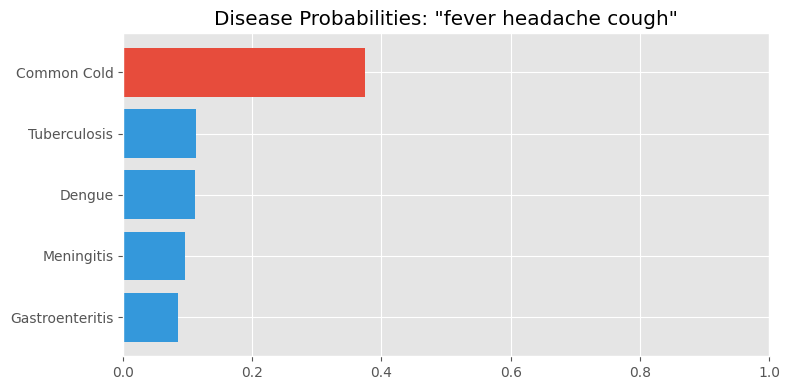

----------------------------------------
Analyzing: 'chest pain shortness of breath'
Results:
  Naive Bayes: Heart Attack (41.85%, Medium confidence)
  Random Forest: Heart Attack (44.73%, Medium confidence)
FINAL: Heart Attack (43.29%, Medium confidence)


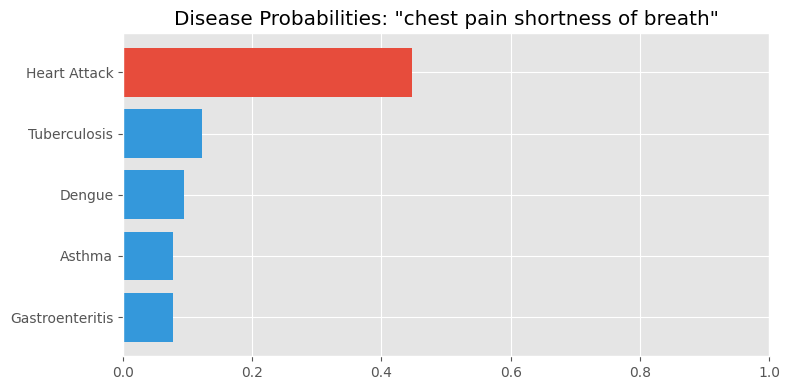

----------------------------------------
Models saved to 'models/' directory


In [22]:
# Symptom analysis function
def predict_disease(symptoms, vectorizer=vectorizer, models=models, le=le):
    '''Predict disease based on symptoms'''
    print(f"Analyzing: '{symptoms}'")
    
    # Process and predict
    X = vectorizer.transform([preprocess_text(symptoms)])
    results = []
    
    # Get predictions from models
    nb_proba = models['nb'].predict_proba(X)[0]
    nb_idx = np.argsort(nb_proba)[-1]
    nb_disease = le.inverse_transform([nb_idx])[0]
    nb_conf = nb_proba[nb_idx]
    results.append((nb_disease, nb_conf, "Naive Bayes"))
    
    rf_proba = models['rf'].predict_proba(X)[0]
    rf_idx = np.argsort(rf_proba)[-1]
    rf_disease = le.inverse_transform([rf_idx])[0]
    rf_conf = rf_proba[rf_idx]
    results.append((rf_disease, rf_conf, "Random Forest"))
    
    # Final prediction (voting)
    predictions = [r[0] for r in results]
    final_pred = max(set(predictions), key=predictions.count)
    avg_conf = sum(r[1] for r in results if r[0] == final_pred) / sum(1 for r in results if r[0] == final_pred)
    confidence_level = "High" if avg_conf >= 0.7 else "Medium" if avg_conf >= 0.4 else "Low"
    
    # Display results
    print("Results:")
    for disease, conf, model in results:
        conf_level = "High" if conf >= 0.7 else "Medium" if conf >= 0.4 else "Low"
        print(f"  {model}: {disease} ({conf:.2%}, {conf_level} confidence)")
    
    print(f"FINAL: {final_pred} ({avg_conf:.2%}, {confidence_level} confidence)")
    
    # Visualize top diseases
    disease_names = le.classes_
    probs = rf_proba
    sorted_idx = np.argsort(probs)
    top_diseases = [disease_names[i] for i in sorted_idx[-5:]]
    top_probs = [probs[i] for i in sorted_idx[-5:]]
    
    plt.figure(figsize=(8, 4))
    colors = ['#3498db'] * 4 + ['#e74c3c']  # Highlight the most probable
    plt.barh(top_diseases, top_probs, color=colors)
    plt.title(f'Disease Probabilities: "{symptoms}"')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
    
    return final_pred, confidence_level

# Test examples
print("Testing prediction with examples:")
for symptoms in ["fever headache cough", "chest pain shortness of breath"]:
    predict_disease(symptoms)
    print("-" * 40)

# Save models
joblib.dump(vectorizer, 'models/vectorizer.pkl')
joblib.dump(nb_model, 'models/naive_bayes_model.pkl')
joblib.dump(rf_model, 'models/random_forest_model.pkl')
joblib.dump(le, 'models/label_encoder.pkl')
print("Models saved to 'models/' directory")


In [17]:
# Interactive symptom analyzer
try:
    import ipywidgets as widgets
    from IPython.display import clear_output
    
    # Create widgets
    symptom_input = widgets.Text(
        value='', 
        placeholder='Enter symptoms (e.g., "fever headache")',
        description='Symptoms:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='80%')
    )
    
    output_area = widgets.Output()
    
    def on_button_clicked(b):
        with output_area:
            clear_output()
            symptoms = symptom_input.value.strip()
            if symptoms:
                predict_disease(symptoms)
            else:
                print("Please enter symptoms first.")
    
    # Create and display UI
    predict_button = widgets.Button(
        description='Predict Disease',
        button_style='primary',
        icon='search'
    )
    predict_button.on_click(on_button_clicked)
    
    widgets.HTML(value="<h3>Interactive Symptom Analyzer</h3>")
    display(symptom_input, predict_button, output_area)
    
except ImportError:
    # Simple fallback for environments without widgets
    def interactive_loop():
        while True:
            symptoms = input("Enter symptoms (or 'q' to quit): ").strip()
            if symptoms.lower() in ('q', 'quit'): break
            if symptoms: predict_disease(symptoms)
    
    print("Enter symptoms like 'fever headache' or 'chest pain'")


Text(value='', description='Symptoms:', layout=Layout(width='80%'), placeholder='Enter symptoms (e.g., "fever …

Button(button_style='primary', description='Predict Disease', icon='search', style=ButtonStyle())

Output()